# 1. Download S&P 500 price data

In [2]:
pip install yfinance

     |████████████████████████████████| 113 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 26.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp39-cp39-macosx_10_9_x86_64.whl size=275098 sha256=4d3a009f21e812c3712d38dde629eb14392b0dc7c180dbcf12be88c530a33914
  Stored in directory: /Users/Kairun/Library/Caches/pip/wheels/95/bb/20/859b0853d3683815ccb6342d9ac5a49380a681c96285821184
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully u

In [26]:
import yfinance as yf
import pandas as pd

In [4]:
#Ticker class enable us to download price history for a single symbol
#GSPC symbol is for S&P 500 index
sp500 = yf.Ticker("^GSPC") 

In [5]:
#Query historical prices, query all data from the very beginning when the index was created
sp500=sp500.history(period="max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-21 00:00:00-04:00,5232.939941,5232.939941,5101.629883,5158.200195,4226340000,0.0,0.0
2025-04-22 00:00:00-04:00,5207.669922,5309.609863,5207.669922,5287.759766,4666950000,0.0,0.0
2025-04-23 00:00:00-04:00,5395.919922,5469.689941,5356.169922,5375.859863,5371390000,0.0,0.0


In the DataFrame, each row is the price on a single trading day, so non_trading day are not included in this data. The columns are the opening price so the price when the market opened, the highest price duraing the day, the lowest price during the day, the closing price when the exchange closed and the volume traded in that day. We will only focuse on these columns to predict if the stock price will go up or down tomorrow. The remaining columns (Dividends and Stock Splits), we will not use them and we will actually remove them later.

In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-04-11 00:00:00-04:00', '2025-04-14 00:00:00-04:00',
               '2025-04-15 00:00:00-04:00', '2025-04-16 00:00:00-04:00',
               '2025-04-17 00:00:00-04:00', '2025-04-21 00:00:00-04:00',
               '2025-04-22 00:00:00-04:00', '2025-04-23 00:00:00-04:00',
               '2025-04-24 00:00:00-04:00', '2025-04-25 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24445, freq=None)

The DatetimeIndex is the index on the very left, the date. That column will enable us to index and slice the DataFrame easily.

# 2. Cleaning and visualization of our data

<AxesSubplot:xlabel='Date'>

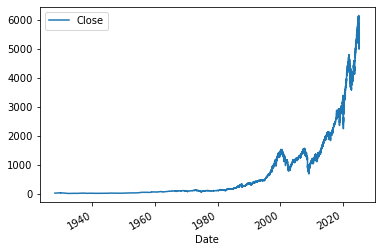

In [8]:
#Plot the closing price against the index
sp500.plot.line(y="Close", use_index=True)

In [11]:
#Delete the extra columns that we do not need 
del sp500["Dividends"]
del sp500["Stock Splits"]

# 3. Set up the target

In [12]:
#Create a column called Tomorrow price by shifting the Close price
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-04-21 00:00:00-04:00,5232.939941,5232.939941,5101.629883,5158.200195,4226340000,5287.759766
2025-04-22 00:00:00-04:00,5207.669922,5309.609863,5207.669922,5287.759766,4666950000,5375.859863
2025-04-23 00:00:00-04:00,5395.919922,5469.689941,5356.169922,5375.859863,5371390000,5484.770020


In [14]:
#"Target" is what we wanna predict. So we convert it into a integer.
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-04-21 00:00:00-04:00,5232.939941,5232.939941,5101.629883,5158.200195,4226340000,5287.759766,1
2025-04-22 00:00:00-04:00,5207.669922,5309.609863,5207.669922,5287.759766,4666950000,5375.859863,1
2025-04-23 00:00:00-04:00,5395.919922,5469.689941,5356.169922,5375.859863,5371390000,5484.770020,1


We can see a target column now. When it's a 1 the price went up and when it's a 0 the price went down.

Usually a lot of historical data is great but with stock market data if we go back too far  the market could have shifted fundamentally and some of that old data may not be as useful in making future predictions. So what we are going to remove all data that can before 1990.

In [16]:
sp500 = sp500.loc["1990-01-01":].copy()

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-04-21 00:00:00-04:00,5232.939941,5232.939941,5101.629883,5158.200195,4226340000,5287.759766,1
2025-04-22 00:00:00-04:00,5207.669922,5309.609863,5207.669922,5287.759766,4666950000,5375.859863,1
2025-04-23 00:00:00-04:00,5395.919922,5469.689941,5356.169922,5375.859863,5371390000,5484.770020,1


# 4. First ML model

In [18]:
from sklearn.ensemble import RandomForestClassifier

Random Forests work by training a lot of individual decision trees with randomized parameters and then averaging the results from those decision trees. So because of this process, random forests are resistant to overfitting. They also run quickly and they can pick up non-linear tendencies in the data. As we can see in the DataFrame, the open price is not linearly correlated with the target (if the open price is 4000 versus 300 there is no linear relantionship between the open price and the target).

We will train our data with Random Forest Classification (Supervised Learning Model), because we have two possible outputs: 1 if the stock price will go up and 0 if the stock price will go down, in order to buy or sell.

In [20]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

n_estimators: number of individual decision trees, the higher the better the accuracy (with a limit).

min_samples_splits: helps to protect against overfitting because decision trees have a tendency to overfit if it's buit too deeply. The higher the less accurate the model will be.

random_state: if we run the same model twice the random numbers that are generated will be in a predictable sequence each time using this random seed of 1. If we rerun it twice, we'll get the same results.

In [21]:
train = sp500.iloc[:-100]
test=sp500.iloc[-100:]

Let's split our data up into a train and test set. This is time series data, so we can't use cross validation.

We will train all the rows except the last 100 ones and once we get the training, we will predict by testing the last 100 ones.

In [22]:
#Create a list with all of the colums that we are going to use to predict the target.
predictors = ["Close","Volume", "Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

## Measure the accuracy of the model 

In [23]:
from sklearn.metrics import precision_score

Precision_score says if the target really go up (1) when the market go up. What percentage of the time when we said the market would go up did it actually go up.

In [24]:
preds = model.predict(test[predictors])

In [27]:
preds = pd.Series(preds, index=test.index)

In [28]:
preds

Date
2024-11-29 00:00:00-05:00    1
2024-12-02 00:00:00-05:00    1
2024-12-03 00:00:00-05:00    1
2024-12-04 00:00:00-05:00    1
2024-12-05 00:00:00-05:00    1
                            ..
2025-04-21 00:00:00-04:00    1
2025-04-22 00:00:00-04:00    1
2025-04-23 00:00:00-04:00    1
2025-04-24 00:00:00-04:00    1
2025-04-25 00:00:00-04:00    1
Length: 100, dtype: int64

In [29]:
precision_score(test["Target"], preds)

0.5050505050505051

This is actually not a very good precision score. The stock price will only go up 50,51% of the time. We are going to make this model better and we will be able to get more accurate predictions.

In [30]:
#Plot our predictions combining our actual values with our predicted values.
combined = pd.concat([test["Target"],preds], axis=1)

<AxesSubplot:xlabel='Date'>

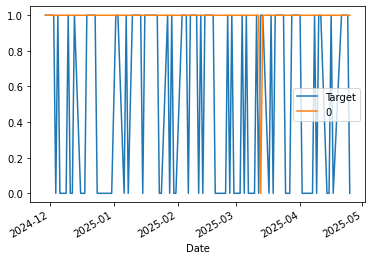

In [31]:
combined.plot()

The orange line is our predictions and the blue line is what actually happened. We mostly predicted that the market would go up and mostly it seems to have gone down. That's why our predictions were so far off.

# 5. Backtesting system

We will build a more robust way to test our algorithm. Currently we're only able to test against the last 100 days. If we are really building a stock price model and we want to use it in the real world we want to be able to test across multiple years of data because we want to know how our algorith is going to handle a lot of different situacions. That gives us more confidence that it will work in the future.

In [40]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [41]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

Every trading year has 250 days, so we are taking 10 years of data. The steps mean that we will train a model for about a year and then going for the next year and going for the next year. We are going yo take the first 10 years of data and predict values for the 11th year, then we will take the fist 11 years of data and predict values for the 12th year, then we will take the first 12 years of data and predict values for the 13th year and so on. By doing this, we will actually get predictions for a lot of different years and be able to have more confidence on our model


In [42]:
predictions = backtest(sp500, model, predictors)

In [43]:
#How many days we predicted the market would go up versus down
predictions["Predictions"].value_counts()

0    3736
1    2659
Name: Predictions, dtype: int64

The market would go up on about 2659 days and go down on about 3736 days.

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5291462955998496

So when we say the market would go up it went up 52,91% of the times.

In [47]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.535887
0    0.464113
Name: Target, dtype: float64

As the benchmark what we can look at is the percentage of days where the market actually went up. The S&P 500  in the days we were looking at actually went up 53.6% of days and went down 46.4% of days. 

This algorithm performed a little bit worse than just the natural percentage of days that the stock market went up.

# 6. Additional predictors

In [48]:
horizons = [2,5,60,250,1000]

We will calculate the mean price in the last 2 days, the last week (5 trading days), the last two months (60 trading days), the last year (250 trading days) and the last 4 years (1000 trading days).

Then we will find the ratio between today's closing price and the closing price in those periods, which will help us know if the market is going up a ton because if so it may be bue for a downturn, has the market gone down a ton if so it may be due for an upswing. So we are giving the algorithm more information to help it make better predictions.

In [51]:
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}" #Call ratio column as Close Ratio (horizon)
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}" #Call trend column as Trend (horizon), is the number of days in the past horizon days that the stock price went up
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [53]:
sp500 = sp500.dropna()

In [54]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-17 00:00:00-04:00,5305.450195,5328.310059,5255.580078,5282.700195,4714880000,5158.200195,0,1.000663,1.0,0.988368,3.0,0.916556,29.0,0.933819,143.0,1.133282,525.0
2025-04-21 00:00:00-04:00,5232.939941,5232.939941,5101.629883,5158.200195,4226340000,5287.759766,1,0.988076,1.0,0.972541,2.0,0.897447,28.0,0.911688,143.0,1.106343,525.0
2025-04-22 00:00:00-04:00,5207.669922,5309.609863,5207.669922,5287.759766,4666950000,5375.859863,1,1.012403,1.0,1.001432,2.0,0.922164,29.0,0.934404,143.0,1.133863,526.0


# 7. Improving the model

In [55]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [59]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #model.predit:return 0 or 1, model.predict_proba: return a probability of 0 or 1
                                                       #the second column will be the probability the stock price goes up
    preds[preds >= .6] = 1 #Set a custom threshold, if there's greater than a 60% that the price will go up the model will return that the price will gp up.
    preds[preds < .6] = 0  #This will reduce our total number of trading days so it will reduce the number of days that it predicts the price will go up but it will increase the chance that the price will actually go up on those days
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [60]:
predictions = backtest(sp500,model,new_predictors)

In [61]:
predictions["Predictions"].value_counts()

0.0    4525
1.0     869
Name: Predictions, dtype: int64

We changed the threshold and we asked the model to be more confident in its predictions before it actually predicted the price would go up. This means that we are actually going to be trading we are going to be buyin stock on fewer days.

In [63]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5742232451093211

When the model predicts that the price will go up 57% of the time, it will actually go up. This may not seem good but it is actually pretty good especially given that we are just looking at time series data and we are just looking at historical prices of the index. I would not recommend using this model to go make trades, there are more things we can add to it to make it more accurate. However, the result obtained is good given the data we were given to work with and it is better than our baseline. We actually improved our model from 50,51% to 57,42%.